# Apprentissage non-supervisé

In [2]:
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [3]:
#import sys
#!{sys.executable} -m pip install gower
import gower

## Mesure de distance

In [4]:
# importation des données de musique.csv
data=pd.read_csv('./musique.csv')

In [4]:
data.head()

,id,m1,m2,m3,m4,m5,m6,m7,m8,m9,genre,freq_radio,musicien,transport
0,11,8,9,7,6,6,6,2,7,2,Femme,1_jamais,non,auto
1,13,8,7,3,4,2,4,8,8,8,Femme,1_jamais,non,auto
2,1,10,8,8,8,9,7,9,10,8,Homme,1_jamais,non,bus
3,10,8,10,9,6,5,6,4,5,2,Femme,1_jamais,non,bus
4,21,3,2,3,4,3,5,7,8,9,Homme,1_jamais,non,bus


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          47 non-null     int64 
 1   m1          47 non-null     int64 
 2   m2          47 non-null     int64 
 3   m3          47 non-null     int64 
 4   m4          47 non-null     int64 
 5   m5          47 non-null     int64 
 6   m6          47 non-null     int64 
 7   m7          47 non-null     int64 
 8   m8          47 non-null     int64 
 9   m9          47 non-null     int64 
 10  genre       47 non-null     object
 11  freq_radio  47 non-null     object
 12  musicien    47 non-null     object
 13  transport   47 non-null     object
dtypes: int64(10), object(4)
memory usage: 5.3+ KB


Puisqu'on a des variables de différents type nous allons utiliser la formule de Gower afin de calculer la matrice de distance. On peut utiliser la librairie `gower`. Voici ces arguments:
* data_x : données
* weight : poids de chaque variable, par défaut c'est un vecteur de 1
* cat_features : vecteur de booléen qui indique si une variable est catégorielle ou non, par défaut la fonction va tenter de le déterminer si rien n'est spécifié.

In [11]:
# on retire la colonne id car ce n'est pas une variable
data_x=data.iloc[:,1:]
# on décide de mettre plus de poids sur la musique m2
weights=np.array([1 for i in data_x.columns])
weights[1]=2
# on indique les variables catégorielle
cat=np.array([False for i in data_x.columns])
cat[[9,10,11,12]]=True
gower_mat=gower.gower_matrix(data_x,weight=weights,cat_features=cat)

## K-Moyenne

In [7]:
# on retire les variables qui ne sont pas continue
df=data.loc[:,'m1':'m9']

In [23]:
from sklearn.cluster import KMeans

In [27]:
kmeans = KMeans(n_clusters=6,# Nombre de groupes
                random_state=0, # pour la reproductibilité du code
                n_init=1).fit(df) #nb de fois que l'algo est exécuté avec differents centroides.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [10]:
# on obtient le groupe assigné à chacune des observations
kmeans.labels_

array([2, 1, 5, 2, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 3, 5, 5, 2, 2, 2,
       5, 1, 5, 0, 5, 1, 1, 2, 1, 1, 1, 1, 3, 5, 5, 5, 0, 5, 4, 4, 0, 4,
       0, 5, 2])

In [11]:
# on obtient les coordonnées de chacun des centroides des groupes
kmeans.cluster_centers_

array([[3.75      , 5.        , 5.25      , 9.        , 7.75      ,
        9.75      , 4.75      , 6.        , 8.25      ],
       [8.25      , 8.5       , 2.625     , 4.        , 3.875     ,
        4.125     , 8.375     , 8.625     , 8.        ],
       [7.72727273, 8.81818182, 7.90909091, 4.63636364, 5.81818182,
        7.09090909, 3.36363636, 5.27272727, 2.        ],
       [2.3       , 3.8       , 3.9       , 4.8       , 3.6       ,
        5.2       , 8.4       , 8.8       , 6.5       ],
       [3.33333333, 2.33333333, 4.33333333, 2.33333333, 3.33333333,
        2.33333333, 3.33333333, 4.        , 0.66666667],
       [5.90909091, 5.36363636, 7.        , 8.54545455, 9.54545455,
        8.90909091, 6.18181818, 6.36363636, 7.45454545]])

##  K-médoïdes

In [14]:
#import sys
#!{sys.executable} -m pip install scikit-learn-extra

In [16]:
from sklearn_extra.cluster import KMedoids

In [17]:
# Si on veut utiliser la méthode K-medoide sur toutes les données
# avec différents types de variable on doit utiliser notre
# matrice de distance
kmedoids = KMedoids(n_clusters=6, random_state=0).fit(gower_mat)

In [18]:
# on obtient le groupe assigné à chacune des observations
kmedoids.labels_

array([2, 0, 4, 2, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 3, 3, 3, 5, 4, 2, 2, 2,
       5, 0, 5, 4, 4, 0, 0, 2, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 1, 1, 4, 1,
       5, 5, 2])

In [19]:
# on obtient les coordonnées de chacun des centroides des groupes
kmedoids.cluster_centers_

array([[0.36190477, 0.24861111, 0.28075397, 0.4626984 , 0.37281746,
        0.33313492, 0.35496032, 0.38670635, 0.32876983, 0.3529762 ,
        0.4295635 , 0.4251984 , 0.43015873, 0.4434524 , 0.25416666,
        0.33690476, 0.38373017, 0.45238096, 0.28670636, 0.37261906,
        0.475     , 0.43948412, 0.53055555, 0.18888889, 0.5511905 ,
        0.46130952, 0.34484127, 0.27539682, 0.29742062, 0.29305556,
        0.09583333, 0.10476191, 0.        , 0.20198412, 0.18392858,
        0.41170636, 0.42698413, 0.38690478, 0.4128968 , 0.36369047,
        0.44583333, 0.4081349 , 0.33531746, 0.5253968 , 0.43174604,
        0.4375    , 0.36726192],
       [0.3561508 , 0.35595238, 0.66309524, 0.43551588, 0.3888889 ,
        0.45873016, 0.40674603, 0.40515873, 0.48650795, 0.40714285,
        0.32380953, 0.34603176, 0.3371032 , 0.36825398, 0.4059524 ,
        0.26607144, 0.24781746, 0.41011906, 0.60833335, 0.3311508 ,
        0.40138888, 0.42301586, 0.3954365 , 0.48710316, 0.4263889 ,
        0.45079

## Algorithme hiérarchique

### Plus proche voisin

In [28]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

Assignation des groupes: [4 3 6 4 2 2 2 2 2 2 4 4 4 4 2 2 2 5 6 4 4 4 5 3 5 5 6 3 3 4 3 3 3 3 2 5 5
 5 5 5 1 1 5 1 5 5 4]


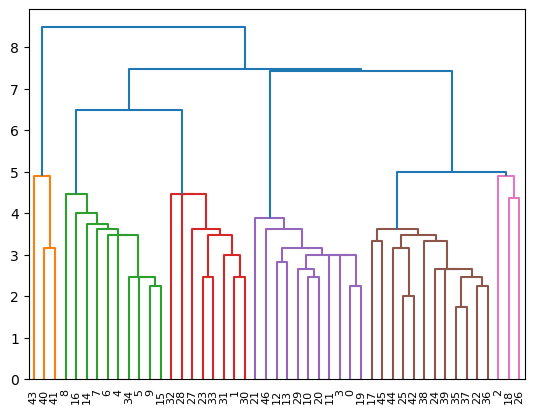

In [24]:
n=len(data) #nb obs
k=6 #nb de groupe
X = data.loc[:,'m1':'m9'] #seulement variable continu
# création de la matrice des regroupements
Z=linkage(X,method='single')
# Assignation des observation à un groupe
T=fcluster(Z, k, 'maxclust')
# Les étiquettes pour l'axe des x
labels=list('' for i in range(n))
for i in range(n):
    labels[i]=str(i)

# où on veut couper l'arbre pour avoir des couleurs différentes
ct=Z[-(k-1),2]  

#Dendogramme
P =dendrogram(Z,labels=labels,color_threshold=ct)
print('Assignation des groupes:', T)

### Voisin plus distant

Assignation des groupes: [2 6 3 2 5 5 5 5 5 5 2 2 2 2 5 5 5 4 3 2 2 2 4 6 4 4 3 6 6 2 6 6 6 6 5 4 4
 4 4 4 1 1 4 1 4 4 2]


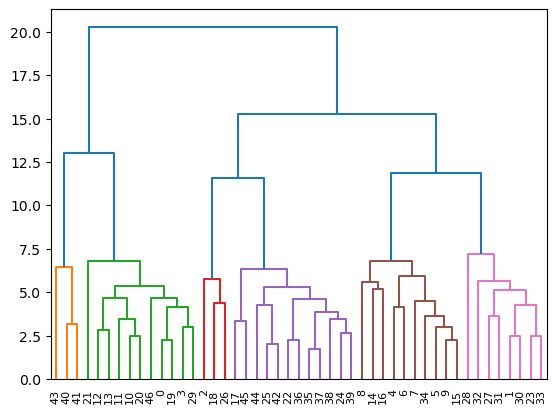

In [21]:
n=len(data) #nb obs
k=6 #nb de groupe
X = data.loc[:,'m1':'m9'] #seulement variable continu
Z= linkage(X,method='complete') # création de la matrice des regroupements
T = fcluster(Z, k, 'maxclust') # Assignation des observation à un groupe

# Les étiquettes pour l'axe des x
labels=list('' for i in range(n))
for i in range(n):
    labels[i]=str(i)

# où on veut couper l'arbre pour avoir des couleurs différentes
ct=Z[-(k-1),2]  

#Dendogramme
P =dendrogram(Z,labels=labels,color_threshold=ct)
print('Assignation des groupes:', T)

<Axes: xlabel='groupes', ylabel='m9'>

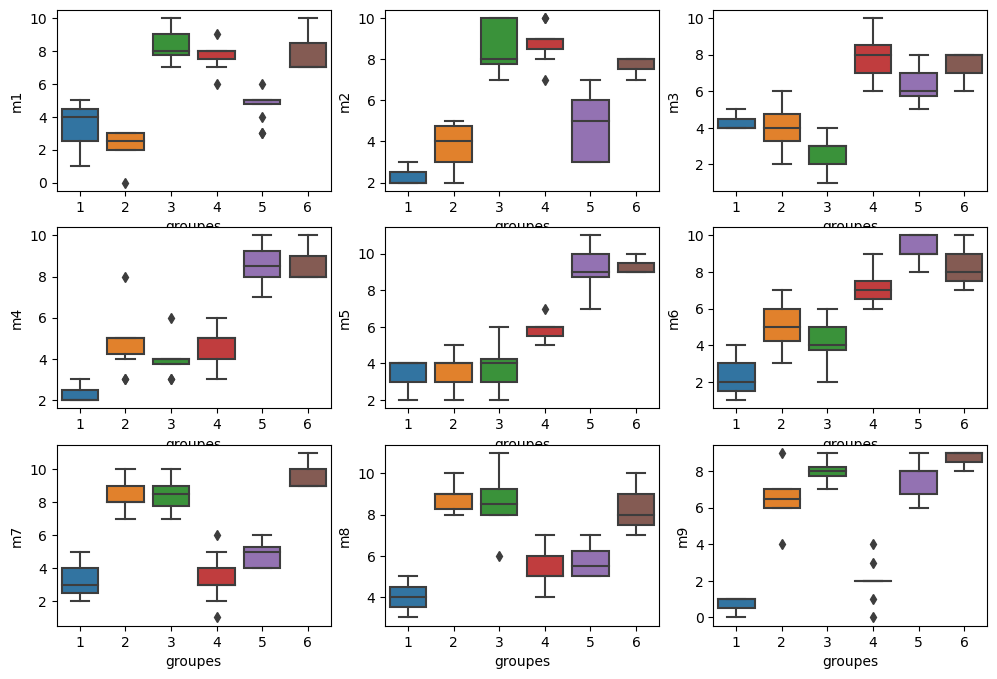

In [25]:
import seaborn as sns
analysis=data.loc[:,'m1':'m9']
analysis['groupes']=T
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(12, 8))
sns.boxplot(y=analysis['m1'],x=analysis['groupes'],ax=ax[0,0])
sns.boxplot(y=analysis['m2'],x=analysis['groupes'],ax=ax[0,1])
sns.boxplot(y=analysis['m3'],x=analysis['groupes'],ax=ax[0,2])
sns.boxplot(y=analysis['m4'],x=analysis['groupes'],ax=ax[1,0])
sns.boxplot(y=analysis['m5'],x=analysis['groupes'],ax=ax[1,1])
sns.boxplot(y=analysis['m6'],x=analysis['groupes'],ax=ax[1,2])
sns.boxplot(y=analysis['m7'],x=analysis['groupes'],ax=ax[2,0])
sns.boxplot(y=analysis['m8'],x=analysis['groupes'],ax=ax[2,1])
sns.boxplot(y=analysis['m9'],x=analysis['groupes'],ax=ax[2,2])

## Segmentation en 2 étapes

In [24]:
#Sélectionner les variables continues
df=data.loc[:,'m1':'m9']
k=6 #nb de groupe
#Méthode Hiérarchique
Z= linkage(X,method='complete') # Voisin le plus distant
T = fcluster(Z, k, 'maxclust') # Assignation des observation à un groupe
df['clusters']=T
#On calcule les centroides
centroid=df.groupby('clusters').mean()
centroid.values
#On fait k-moyenne avec les centroides obtenus comme point de départ
kmeans = KMeans(n_clusters=k,# Nombre de groupes
                random_state=0, # pour la reproductibilité du code
                init=centroid.values).fit(df.loc[:,'m1':'m9']) #nb de fois que l'algo est exécuté avec differents centroides.
df['clusters_kmeans']=kmeans.labels_+1 #+1 pour comparer les # de groupe car algo hier. commence à 1

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
# On compare les regroupements
# Aucune observation n'a changé de regroupement: c'est positif
df['id']=data['id']
pd.pivot_table(df,values='id',index='clusters',columns='clusters_kmeans',aggfunc='count')

clusters_kmeans,1,2,3,4,5,6
clusters,,,,,,
1,3.0,NaN,NaN,NaN,NaN,NaN
2,NaN,11.0,NaN,NaN,NaN,NaN
3,NaN,NaN,3.0,NaN,NaN,NaN
4,NaN,NaN,NaN,12.0,NaN,NaN
5,NaN,NaN,NaN,NaN,10.0,NaN
6,NaN,NaN,NaN,NaN,NaN,8.0


## Choix du nombre de groupe

/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mathieumuty/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_

Text(0.5, 1.0, 'Elbow Method')

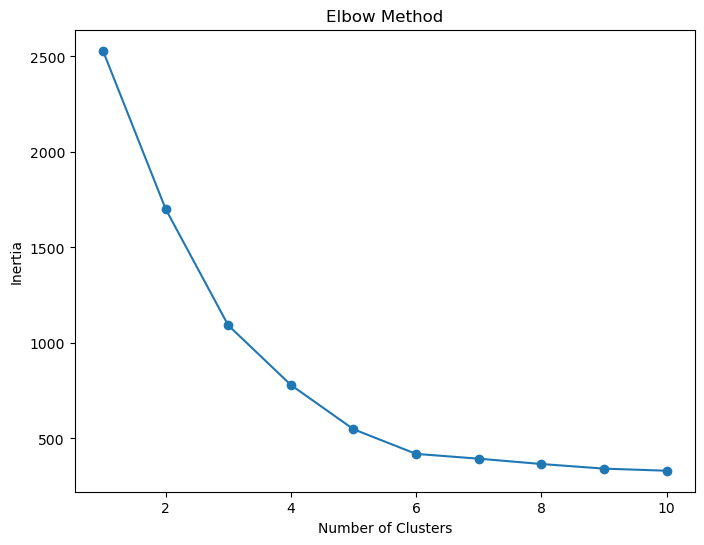

In [29]:
# Calculer l'intertie pour différent k
inertias = []
df=data.loc[:,'m1':'m9']
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df) 
    inertias.append(kmeans.inertia_)

# Figure elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
